In [7]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple
import numpy as np
import pickle
import scienceplots

import sys
sys.path.append('../../')
from Plots import plot_populations, plot_pulses, plot_rewards, plot_noise_effect, get_axis_lims, LINE_STYLES, get_max
plt.style.use('science')

2023-06-19 19:55:42.280924: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-19 19:55:43.923150: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
save_figures =  True

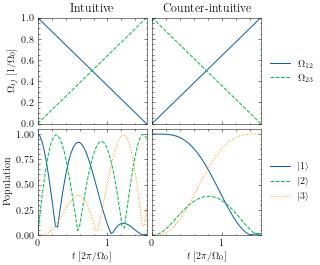

In [3]:
results = pickle.load(open("Data/intuitive_vs_counter.pkl", 'rb'))

omega0 = 1
labels = results[0]
times = results[1]
pulses = results[2]
populations = results[3]

fig, ax = plt.subplots(2, len(labels), figsize=(2*len(labels), 2*2), sharex=True, sharey='row')

for i in range(len(pulses)):
    times_i = times[i][:-1]*omega0/(2*np.pi)
    plot_pulses(times_i, pulses[i], ax[0, i])
    plot_populations(times_i, populations[i][:-1], ax[1, i])

    ax[0, i].set_title(labels[i])

    margin_percentage = [0., 0.]
    x_lims = get_axis_lims(times_i, [0., 0.])

    y_lims = get_axis_lims(pulses, margin_percentage)
    ax[0, i].set_ylim(y_lims)
    ax[0, i].set_xlim(x_lims)
    ax[0, i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    lims = get_axis_lims(populations, [0., 0.05])
    ax[1, i].set_ylim(lims)
    ax[1, i].set_xlim(x_lims)
    ax[1, i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set labels
for i in range(2):
    for j in range(len(labels)):
        ax[i, j].set_ylabel("")
        ax[i, j].set_xlabel("")

ax[0, 0].set_ylabel(r'$\Omega_{ij}\;[1/\Omega_0]$')
ax[1, 0].set_ylabel("Population")

for i in range(len(labels)):
    ax[1, i].set_xlabel(r'$t\;[2\pi/\Omega_0]$')

# Legend only in middle
for i in range(2):
    for j in range(len(labels)):
        if j != len(labels)-1:
            ax[i, j].get_legend().remove()

plt.subplots_adjust(hspace=0.05, wspace=0.05)

# Save figure
if save_figures:
    plt.savefig("Figures/1/intuitive_vs_counter.pdf")

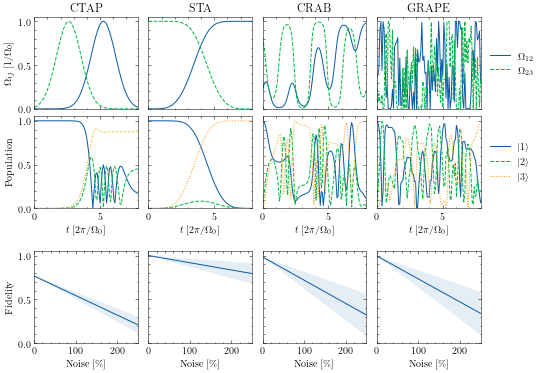

In [26]:
results = pickle.load(open("Data/sota_protocols_comparison_noise_deltas.pkl", "rb"))

omega0 = 1

cases = []
times = []
pulses = []
populations = []
noise_percentages = []
noise_results = []

for result in results:
    cases.append(result[0])
    times.append(result[1]*omega0/(2*np.pi))
    pulses.append(result[2]/omega0)
    populations.append(result[3])
    noise_percentages.append(result[4])
    noise_results.append(result[5])

fig = plt.figure(figsize=(2*len(cases), 2*3))
gs = fig.add_gridspec(len(cases), 4, hspace=0.1, wspace=0.1, height_ratios=[1, 1, 0.3, 1])
# Create matrix of axes
ax = []
for i in range(len(cases)):
    for j in range(4):
        if i == 2:
            continue
        ax.append(fig.add_subplot(gs[i, j]))

# Reshape
ax = np.array(ax).reshape(3, len(cases))

for i in range(len(pulses)):
    time = times[i][:-1]

    plot_pulses(time, pulses[i], ax[0, i])
    plot_populations(time, populations[i][:-1], ax[1, i])
    plot_noise_effect(noise_percentages[i], noise_results[i], ax[2, i])

    ax[0, i].set_title(cases[i])

    margin_percentage = [0., 0.05]
    x_lims = get_axis_lims(time, [0., 0.])

    y_lims = get_axis_lims(pulses, margin_percentage)
    ax[0, i].set_ylim(y_lims)
    ax[0, i].set_xlim(x_lims)
    ax[0, i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    lims = get_axis_lims(populations, margin_percentage)
    ax[1, i].set_ylim(lims)
    ax[1, i].set_xlim(x_lims)
    ax[1, i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    lims = get_axis_lims([0., 1], margin_percentage)
    x_lims = get_axis_lims(noise_percentages[i]*100, [0., 0.])
    ax[2, i].set_ylim(lims)
    ax[2, i].set_xlim(x_lims)

# Set labels
for i in range(3):
    for j in range(len(cases)):
        ax[i, j].set_ylabel("")
        ax[i, j].set_xlabel("")

ax[0, 0].set_ylabel(r'$\Omega_{ij}\;[1/\Omega_0]$')
ax[1, 0].set_ylabel("Population")
ax[2, 0].set_ylabel("Fidelity")

for i in range(len(cases)):
    ax[1, i].set_xlabel(r'$t\;[2\pi/\Omega_0]$')
    ax[2, i].set_xlabel(r'Noise\;[\%]')

# Remove axis numbers
for i in range(len(cases)):
    ax[0, i].tick_params(axis='x', which='both', labelbottom=False)

for i in range(len(cases) - 1):
    for j in range(3):
        ax[j, i + 1].tick_params(axis='y', which='both', labelleft=False)

# Legend only in middle
for i in range(2):
    for j in range(len(cases)):
        if j != len(cases) - 1:
            ax[i, j].get_legend().remove()

# Save figure
if save_figures:
    plt.savefig("Figures/2/sota_protocols_noise_effect_comparison.pdf")

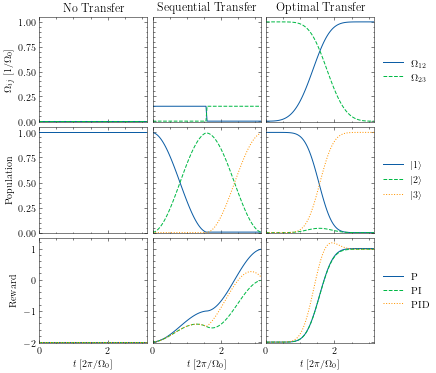

In [5]:
results = np.load("Data/cost_functions.npy", allow_pickle=True)

omega0 = 1
times = results[1]*omega0/(2*np.pi)
cases = results[2]
pulses = results[3]/omega0
populations = results[4]
cost_labels = results[5]
costs = results[6]

fig, ax = plt.subplots(3, 3, figsize=(2*3, 2*3), sharex=True, sharey='row')
for i in range(len(pulses)):
    plot_pulses(times[:-1], pulses[i].T, ax[0, i])
    plot_populations(times[:-1], populations[i], ax[1, i])

    ax[0, i].set_title(cases[i])

    margin_percentage = [0.01, 0.05]
    x_lims = get_axis_lims(times[:-1], [0., 0.])

    y_lims = get_axis_lims(pulses, margin_percentage)
    ax[0, i].set_ylim(y_lims)
    ax[0, i].set_xlim(x_lims)
    ax[0, i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    lims = get_axis_lims(populations, [0., 0.05])
    ax[1, i].set_ylim(lims)
    ax[1, i].set_xlim(x_lims)
    ax[1, i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

x_lims = get_axis_lims(times[:-1], [0., 0.])

for i in range(len(costs)):
    cost = np.array([costs[0][i], costs[1][i], costs[2][i]])
    plot_rewards(cost_labels, times[:-1], cost, ax[2, i])
    lims = get_axis_lims(costs, [0.01, 0.05])
    ax[2, i].set_ylim(lims)
    ax[2, i].set_xlim(x_lims)
    ax[2, i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set labels
for i in range(3):
    for j in range(3):
        ax[i, j].set_ylabel("")
        ax[i, j].set_xlabel("")

ax[0, 0].set_ylabel(r'$\Omega_{ij}\;[1/\Omega_0]$')
ax[1, 0].set_ylabel("Population")
ax[2, 0].set_ylabel("Reward")

for i in range(3):
    ax[2, i].set_xlabel(r'$t\;[2\pi/\Omega_0]$')

# Legend only in middle
for i in range(3):
    for j in range(3):
        if j != 2:
            ax[i, j].get_legend().remove()

plt.subplots_adjust(hspace=0.05, wspace=0.05)

# Save figure
if save_figures:
    plt.savefig("Figures/2/cost_functions.pdf")

 & \textbf{Pure - STA} & \textbf{Pure - P} & \textbf{Pure - PID} & \textbf{Mixed - P}\\
\hline
\textbf{Energy [$\Omega_0$]} & 2.90 & 0.52 & 1.61 & 2.33\\
\textbf{Max. Interm. Population} & 0.05 & 0.49 & 0.10 & 0.12\\
\textbf{Max. Fidelity} & 1.00 & 1.00 & 0.97 & 0.93\\
\textbf{Time [$2\pi/\Omega_0$]} & 2.90 & 0.77 & 2.66 & 2.90\\


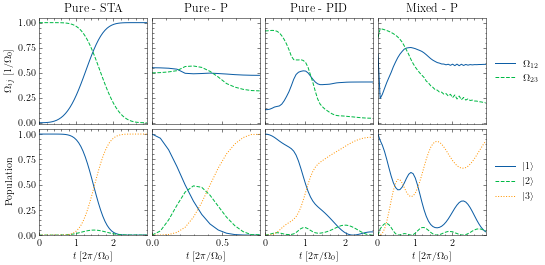

In [14]:
results = pickle.load(open("Data/3_states_comparison.pkl", "rb"))

omega0 = get_max(results[2])
labels = results[0]
times = results[1]
pulses = results[2]/omega0
populations = results[3]

fig, ax = plt.subplots(2, len(labels), figsize=(2*len(labels), 2*2), sharey='row')

table = []

for i in range(len(pulses)):
    index_max_fidelity = np.argmax(populations[i][:,-1]) + 1
    times_i = times[i][:index_max_fidelity]*omega0/(2*np.pi)
    pulses_i = pulses[i][:index_max_fidelity]
    populations_i = populations[i][:index_max_fidelity]

    max_fidelity = populations_i[-1,-1]
    time_max_fidelity = times_i[-1]
    energy = np.sum(np.sqrt(np.sum(pulses_i**2, axis=1)))*times_i[-1]/len(times_i)
    max_iterm_pop = np.max(populations_i[:,1:-1])

    plot_pulses(times_i, pulses_i, ax[0, i])
    plot_populations(times_i, populations_i, ax[1, i])

    ax[0, i].set_title(labels[i])

    margin_percentage = [0.01, 0.05]
    x_lims = get_axis_lims(times_i, [0., 0.])

    y_lims = get_axis_lims(pulses, margin_percentage)
    ax[0, i].set_ylim(y_lims)
    ax[0, i].set_xlim(x_lims)
    ax[0, i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    lims = get_axis_lims(populations, [0., 0.05])
    ax[1, i].set_ylim(lims)
    ax[1, i].set_xlim(x_lims)
    ax[1, i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    table.append([labels[i], energy, max_iterm_pop, max_fidelity, time_max_fidelity])

# Set labels
for i in range(2):
    for j in range(len(labels)):
        ax[i, j].set_ylabel("")
        ax[i, j].set_xlabel("")

ax[0, 0].set_ylabel(r'$\Omega_{ij}\;[1/\Omega_0]$')
ax[1, 0].set_ylabel("Population")

for i in range(len(labels)):
    ax[1, i].set_xlabel(r'$t\;[2\pi/\Omega_0]$')

# Legend only in middle
for i in range(2):
    for j in range(len(labels)):
        if j != len(labels)-1:
            ax[i, j].get_legend().remove()

plt.subplots_adjust(hspace=0.05, wspace=0.05)

# Table
table = np.array(table).T
properties = ["", "Energy [$\Omega_0$]", "Max. I. P.", "Max. Fidelity", "$t_{{max}}$ [$2\pi/\Omega_0$]"]
for i, row in enumerate(table):
    if i == 0:
        for value in row:
            print(f" & \\textbf{{{value}}}", end="")
        print("\\\\")
        print("\\hline")
    else:
        print(f"\\textbf{{{properties[i]}}}", end="")
        for value in row:
            print(f" & {float(value):.2f}", end="")
        print("\\\\")

# Remove axis numbers
for i in range(len(labels)):
    ax[0, i].tick_params(axis='x', which='both', labelbottom=False)

# Save figure
if save_figures:
    plt.savefig("Figures/3/3-states-comparison.pdf")

\textbf{Fidelity (10\% noise)} & 0.72 $\pm$ 0.17 & 0.81 $\pm$ 0.17 & 0.83 $\pm$ 0.15 & 0.86 $\pm$ 0.12 & 0.98 $\pm$ 0.02\\


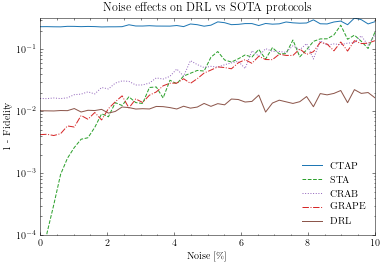

In [17]:
def antifidelity(fidelity):
    return np.array([1 - fidelity.T[0], fidelity.T[1]]).T

results = pickle.load(open("Data/sota_protocols_comparison_noise.pkl", "rb"))
reulst_rl = pickle.load(open("Data/3_noise_rl.pkl", "rb"))

COLORS = ["tab:blue", "tab:green", "tab:purple", "tab:red", "tab:brown"]
cases = []
noise_percentages = []
noise_results = []

for result in results:
    cases.append(result[0])
    noise_percentages.append(result[4])
    noise_results.append(antifidelity(result[5]))

cases.append("DRL")
noise_results.append(antifidelity(reulst_rl[0]))
noise_percentages.append(reulst_rl[1])

fig, ax = plt.subplots(figsize=(2*3, 2*2))
# Set log scale
ax.set_yscale('log')
table = f"\\textbf{{Fidelity ({noise_percentages[-1][-1]*100:.0f}\% noise)}}"
for i in range(len(cases)):
    plot_noise_effect(noise_percentages[i], noise_results[i], ax, show_standard_dev=False)
    ax.lines[-1].set_label(cases[i])
    ax.lines[-1].set_linestyle(LINE_STYLES[i % len(LINE_STYLES)])
    ax.lines[-1].set_color(COLORS[i % len(COLORS)])

    ax.set_title("Noise effects on DRL vs SOTA protocols")

    margin_percentage = [0., 0.05]
    x_lims = get_axis_lims(noise_percentages[i]*100, [0., 0.])
    ax.set_ylim(bottom=10e-5)
    ax.set_xlim(x_lims)

    last_mean, last_std = noise_results[i][-1]
    table += f" & {1 - last_mean:.2f} $\pm$ {last_std:.2f}"

ax.legend(loc='lower right')

for i in range(len(cases)):
    ax.set_xlabel(r'Noise\;[\%]')

plt.subplots_adjust(hspace=0.4, wspace=0.2)
print(table + "\\\\")

ax.set_ylabel("1 - Fidelity")

# Save figure
if save_figures:
    plt.savefig("Figures/3/noise_effect_comparison.pdf")

\textbf{Fidelity (50\% noise)} & 0.77 $\pm$ 0.00 & 1.00 $\pm$ 0.00 & 0.98 $\pm$ 0.00 & 1.00 $\pm$ 0.00\\


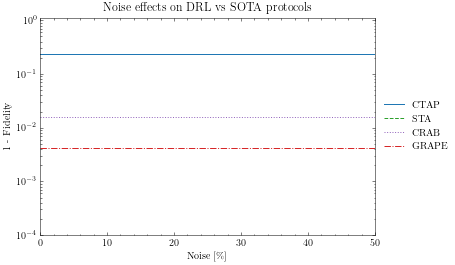

In [15]:
def antifidelity(fidelity):
    return np.array([1 - fidelity.T[0], fidelity.T[1]]).T

results = pickle.load(open("Data/sota_protocols_comparison_noise_deltas.pkl", "rb"))
#reulst_rl = pickle.load(open("Data/3_noise_deltas_rl.pkl", "rb"))

COLORS = ["tab:blue", "tab:green", "tab:purple", "tab:red", "tab:brown"]
cases = []
noise_percentages = []
noise_results = []

for result in results:
    cases.append(result[0])
    noise_percentages.append(result[4])
    noise_results.append(antifidelity(result[5]))

#cases.append("DRL")
#noise_results.append(antifidelity(reulst_rl[0]))
#noise_percentages.append(reulst_rl[1])

fig, ax = plt.subplots(figsize=(2*3, 2*2))
# Set log scale
ax.set_yscale('log')
table = f"\\textbf{{Fidelity ({noise_percentages[-1][-1]*100:.0f}\% noise)}}"
for i in range(len(cases)):
    plot_noise_effect(noise_percentages[i], noise_results[i], ax, show_standard_dev=True)
    ax.lines[-1].set_label(cases[i])
    ax.lines[-1].set_linestyle(LINE_STYLES[i % len(LINE_STYLES)])
    ax.lines[-1].set_color(COLORS[i % len(COLORS)])

    ax.set_title("Noise effects on DRL vs SOTA protocols")

    margin_percentage = [0., 0.05]
    x_lims = get_axis_lims(noise_percentages[i]*100, [0., 0.])
    ax.set_ylim(bottom=10e-5)
    ax.set_xlim(x_lims)

    last_mean, last_std = noise_results[i][-1]
    table += f" & {1 - last_mean:.2f} $\pm$ {last_std:.2f}"

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for i in range(len(cases)):
    ax.set_xlabel(r'Noise\;[\%]')

plt.subplots_adjust(hspace=0.4, wspace=0.2)
print(table + "\\\\")

ax.set_ylabel("1 - Fidelity")

# Save figure
if save_figures:
    plt.savefig("Figures/3/noise_deltas_effect_comparison.pdf")

 & \textbf{Pure - STA \& Sequential} & \textbf{Mixed - P} & \textbf{Pure - STA \& Straddling} & \textbf{Mixed - P}\\
\hline
\textbf{Energy [$\Omega_0$]} & 3.20 & 3.67 & 6.72 & 6.06\\
\textbf{Max. I. P.} & 1.00 & 0.39 & 0.05 & 0.24\\
\textbf{Max. Fidelity} & 0.99 & 0.98 & 0.99 & 1.00\\
\textbf{$t_{{max}}$ [$2\pi/\Omega_0$]} & 3.20 & 2.94 & 3.50 & 2.14\\


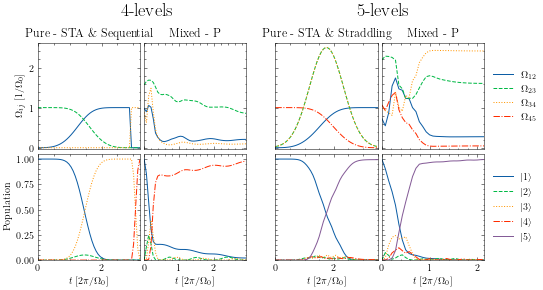

In [9]:
results = pickle.load(open("Data/4_5_states_comparison.pkl", "rb"))

omega0 = 1.#get_max(results[2])
labels = results[0]
times = results[1]
pulses = results[2]
for pulse in pulses:
    pulse /= omega0
populations = results[3]

fig = plt.figure(figsize=(2*len(labels), 2*2))
gs = fig.add_gridspec(2, len(labels) + 1, hspace=0.05, wspace=0.05, width_ratios=[1, 1, 0.2, 1, 1])
# Create matrix of axes
ax = []
for i in range(2):
    for j in range(len(labels) + 1):
        if j == 2:
            continue
        ax.append(fig.add_subplot(gs[i, j]))

# Reshape
ax = np.array(ax).reshape(2, len(labels))

table = []
for i in range(len(pulses)):
    index_max_fidelity = np.argmax(populations[i][:,-1]) + 1
    times_i = times[i][:index_max_fidelity]*omega0/(2*np.pi)
    pulses_i = pulses[i][:index_max_fidelity]
    populations_i = populations[i][:index_max_fidelity]

    max_fidelity = populations_i[-1,-1]
    time_max_fidelity = times_i[-1]
    energy = np.sum(np.sqrt(np.sum(pulses_i**2, axis=1)))*times_i[-1]/len(times_i)
    max_iterm_pop = np.max(populations_i[:,1:-1])

    plot_pulses(times_i, pulses_i, ax[0, i])
    plot_populations(times_i, populations_i, ax[1, i])

    ax[0, i].set_title(labels[i])

    margin_percentage = [0.01, 0.05]
    x_lims = get_axis_lims(times_i, [0., 0.])

    y_lims = get_axis_lims(pulses, margin_percentage)
    ax[0, i].set_ylim(y_lims)
    ax[0, i].set_xlim(x_lims)
    ax[0, i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    lims = get_axis_lims(populations, [0., 0.05])
    ax[1, i].set_ylim(lims)
    ax[1, i].set_xlim(x_lims)
    ax[1, i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    table.append([labels[i], energy, max_iterm_pop, max_fidelity, time_max_fidelity])

# Set labels
for i in range(2):
    for j in range(len(labels)):
        ax[i, j].set_ylabel("")
        ax[i, j].set_xlabel("")

ax[0, 0].set_ylabel(r'$\Omega_{ij}\;[1/\Omega_0]$')
ax[1, 0].set_ylabel("Population")

for i in range(len(labels)):
    ax[1, i].set_xlabel(r'$t\;[2\pi/\Omega_0]$')

# Legend only in middle
for i in range(2):
    for j in range(len(labels)):
        if j != len(labels)-1:
            ax[i, j].get_legend().remove()

# Add text
x_text = 2.6
y_text = 3.3
ax[0, 0].text(x_text, y_text, '4-levels', fontsize=18)
ax[0, 2].text(x_text + 0.2, y_text, '5-levels', fontsize=18)

# Remove axis numbers
for i in range(len(labels)):
    ax[0, i].tick_params(axis='x', which='both', labelbottom=False)

for i in range(len(labels) - 1):
    for j in range(2):
        ax[j, i + 1].tick_params(axis='y', which='both', labelleft=False)

# Table
table = np.array(table).T
properties = ["", "Energy [$\Omega_0$]", "Max. I. P.", "Max. Fidelity", "$t_{{max}}$ [$2\pi/\Omega_0$]"]
for i, row in enumerate(table):
    if i == 0:
        for value in row:
            print(f" & \\textbf{{{value}}}", end="")
        print("\\\\")
        print("\\hline")
    else:
        print(f"\\textbf{{{properties[i]}}}", end="")
        for value in row:
            print(f" & {float(value):.2f}", end="")
        print("\\\\")

# Save figure
if save_figures:
    plt.savefig("Figures/3/4_5-states-comparison.pdf")